In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Set default plot style
plt.style.use("ggplot")

Trying to use monte carlo simulation with brownian motion stock prices to construct a 3 stock portfolio of META NVDA and the Index SOXL with a caveat of also having long option calls on the VIX to interact with tail risk (IE market blowing up during portfolio construction) did not use mean variance optimization either, very simple and basic.

In [4]:
def monte_carlo_simulation(
    ticker: str,
    last_price: float,
    mu: float,
    sigma: float,
    sim_days: int = 15,
    n_simulations: int = 10000
) -> dict:
    """
    Run Monte Carlo simulation for projected stock price.

    Parameters:
        ticker (str): Ticker symbol (for labeling only)
        last_price (float): Most recent closing price
        mu (float): Daily mean return (e.g. 0.0008)
        sigma (float): Daily volatility (e.g. 0.025)
        sim_days (int): Days to simulate
        n_simulations (int): Number of simulations

    Returns:
        dict: Summary stats (expected price, std dev, CI)
    """
    simulated_prices = np.zeros(n_simulations)

    for i in range(n_simulations):
        price = last_price
        for _ in range(sim_days):
            rand = np.random.normal()
            price *= np.exp((mu - 0.5 * sigma ** 2) + sigma * rand)
        simulated_prices[i] = price

    # Summary statistics
    expected_price = np.mean(simulated_prices)
    std_dev = np.std(simulated_prices)
    ci_95 = (
        np.percentile(simulated_prices, 2.5),
        np.percentile(simulated_prices, 97.5)
    )

    # Plot histogram
    plt.figure(figsize=(8, 4))
    plt.hist(simulated_prices, bins=50, alpha=0.75)
    plt.title(f"{ticker} Price Simulation - {sim_days} Trading Days")
    plt.xlabel("Simulated Price")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return {
        "Ticker": ticker,
        "Last Price": last_price,
        "Expected Price": round(expected_price, 2),
        "Standard Deviation": round(std_dev, 2),
        "95% CI Low": round(ci_95[0], 2),
        "95% CI High": round(ci_95[1], 2)
    }


now we run each ticker via its respected simulation the idea is to use the VIX index as a form of volitlity information hedge

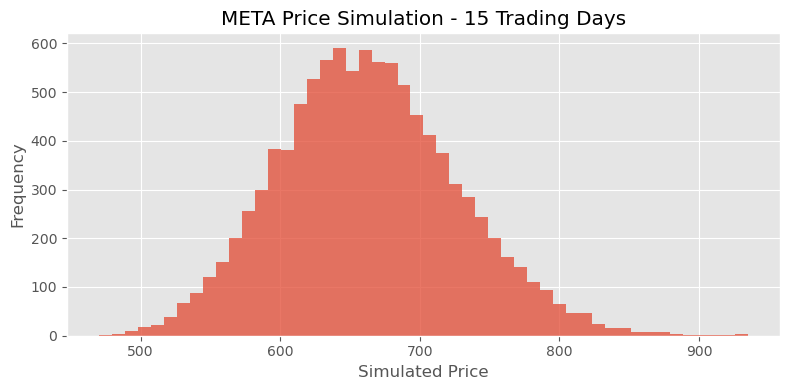

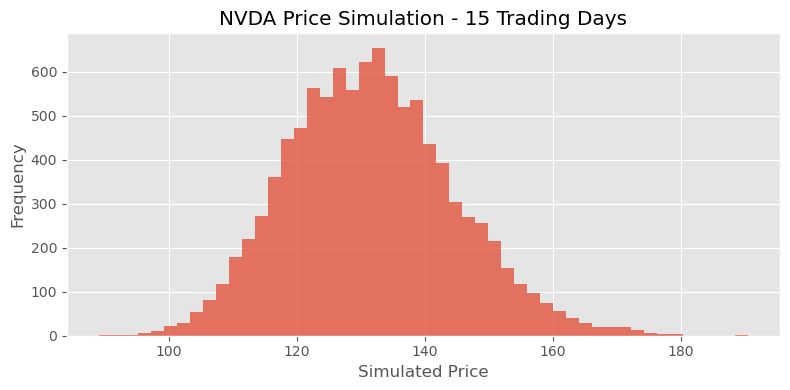

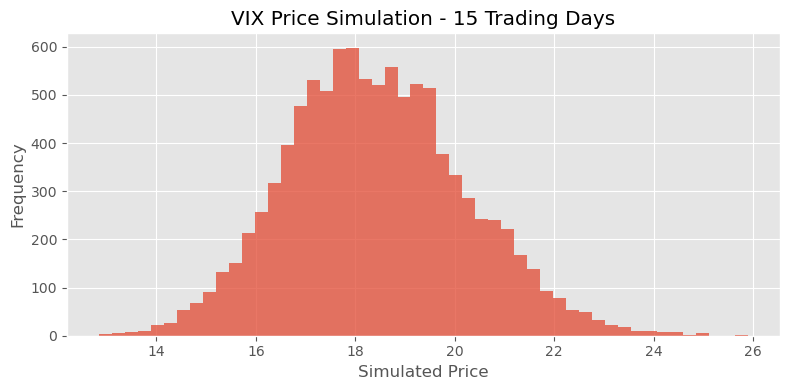

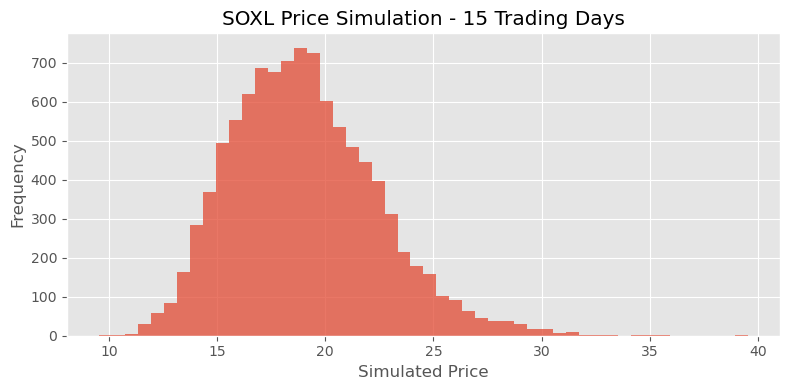

In [7]:
meta_results = monte_carlo_simulation(
    ticker="META",
    last_price=656.03,
    mu=0.0008,
    sigma=0.025,
    sim_days=15
)

nvda_results = monte_carlo_simulation(
    ticker="NVDA",
    last_price=129.93,
    mu=0.0008,
    sigma=0.025,
    sim_days=15
)

vix_results = monte_carlo_simulation(
    ticker="VIX",
    last_price=18.22,
    mu=0.0008,
    sigma=0.025,
    sim_days=15
)

soxl_results = monte_carlo_simulation(
    ticker="SOXL",
    last_price=18.60,
    mu=0.0015,
    sigma=0.045,
    sim_days=15
)


instead we model a 3 stock portoflio using only options and consisdering the mean ( return) and std dev sigma (annualized risk) as only a call optiopn payoff simply put as [Max(St-k,0)]. Yet the cavaet is we also have long call on the VIX in order to minimimize market risk of blowning up (Tail risk black swan). The whole point of this sturtcure is to show the mean varaince portfolio optimzation can be long and tideous for no reason instead i give a sligtly higher return and higher return on risk (if market blows up). You profit going long two large cap voltiale stocks woth great return and a high tech industry filled with IV (SOXL) yet also have safety in knowing of massive vol goes against you, you are saved by the VIX.

In [12]:
# combine results into dataframe 
df = pd.DataFrame([
    meta_results,
    nvda_results,
    vix_results,
    soxl_results
])

df.set_index("Ticker", inplace=True)
df.head()


,Last Price,Expected Price,Standard Deviation,95% CI Low,95% CI High
Ticker,,,,,
META,656.03,662.99,64.23,544.85,795.62
NVDA,129.93,131.62,13.01,108.28,158.82
VIX,18.22,18.42,1.80,15.12,22.13
SOXL,18.60,19.03,3.38,13.45,26.58
